In [45]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import Image
import re
import eurostat
import wbgapi as wb
import pandas as pd

toc_df = eurostat.get_toc_df()
eurostat.subset_toc_df(toc_df, 'energy')

eurostat.get_data('ten00126', flags=False)

eurostat.get_data_df('ten00126', flags=False)

In [23]:
#table CO2 emission per country in 2017 - Source wikipedia
url= "https://fr.wikipedia.org/wiki/Liste_des_pays_par_%C3%A9missions_de_dioxyde_de_carbone"

In [39]:
html = requests.get(url).content
soup = BeautifulSoup(html, "lxml")
table = soup.find_all('table',{'class':'wikitable'})[0]
rows= table.find_all('tr')
rows=[row.text.strip().split('\n') for row in rows]
for i in rows:
    for item in i:
        if item == '':
            i.remove(item)
rows

[['Pays',
  'Émissions de CO2en milliards de tonnes(Gt/an)',
  'en\xa0%',
  'Émissions de CO2en tonnes par habitant(t/hab./an)'],
 ['Monde entier', '32,84', '100\xa0%', '4,37'],
 ['Chine', '9,26', '28,2\xa0%', '6,68'],
 ['États-Unis', '4,76', '14,5\xa0%', '14,61'],
 ['Inde', '2,16', '6,6\xa0%', '1,61'],
 ['Russie', '1,54', '4,7\xa0%', '10,64'],
 ['Japon', '1,13', '3,4\xa0%', '8,94'],
 ['Allemagne', '0,72', '2,2\xa0%', '8,70'],
 ['Corée du Sud', '0,60', '1,8\xa0%', '11,66'],
 ['Iran', '0,57', '1,7\xa0%', '6,99'],
 ['Canada', '0,55', '1,7\xa0%', '14,99'],
 ['Arabie saoudite', '0,53', '1,6\xa0%', '16,16'],
 ['Indonésie', '0,50', '1,5\xa0%', '1,88'],
 ['Mexique', '0,45', '1,4\xa0%', '3,62'],
 ['Brésil', '0,43', '1,3\xa0%', '2,04'],
 ['Afrique du Sud', '0,42', '1,3\xa0%', '7,43'],
 ['Australie', '0,38', '1,2\xa0%', '15,63'],
 ['Turquie', '0,38', '1,2\xa0%', '4,71'],
 ['Royaume-Uni', '0,36', '1,1\xa0%', '5,43'],
 ['Italie', '0,32', '1,0\xa0%', '5,31'],
 ['France', '0,31', '0,9\xa0%', '4,56']

In [43]:
import pandas as pd
colnames=rows[0]
data=rows[1:]
data=pd.DataFrame(rows,columns=colnames)
data = data.iloc[1: , :] #remove the first row
data

,Pays,Émissions de CO2en milliards de tonnes(Gt/an),en %,Émissions de CO2en tonnes par habitant(t/hab./an)
1,Monde entier,"32,84",100 %,"4,37"
2,Chine,"9,26","28,2 %","6,68"
3,États-Unis,"4,76","14,5 %","14,61"
4,Inde,"2,16","6,6 %","1,61"
5,Russie,"1,54","4,7 %","10,64"
6,Japon,"1,13","3,4 %","8,94"
7,Allemagne,"0,72","2,2 %","8,70"
8,Corée du Sud,"0,60","1,8 %","11,66"
9,Iran,"0,57","1,7 %","6,99"
10,Canada,"0,55","1,7 %","14,99"


In [85]:
wb.series.info(q="gdp") 

id,value
EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)"
NY.GDP.DEFL.KD.ZG,"Inflation, GDP deflator (annual %)"
NY.GDP.DEFL.KD.ZG.AD,"Inflation, GDP deflator: linked series (annual %)"
NY.GDP.DEFL.ZS,GDP deflator (base year varies by country)
NY.GDP.DEFL.ZS.AD,GDP deflator: linked series (base year varies by country)
NY.GDP.DISC.CN,Discrepancy in expenditure estimate of GDP (current LCU)
NY.GDP.DISC.KN,Discrepancy in expenditure estimate of GDP (constant LCU)
NY.GDP.MKTP.CD,GDP (current US$)


In [117]:
business = wb.data.DataFrame('NY.GDP.PCAP.PP.KD') 
ren1 = wb.data.DataFrame('NY.GDP.PCAP.PP.KD', time=range(2010,2020))
ren1.reset_index(inplace = True)
ren1.to_csv(r'C:\Users\gixi_\Downloads\Project2\GDP.csv', index =False)

#GDP per capital

In [116]:
wb.series.info(q="energy") 

id,value
EG.EGY.PRIM.PP.KD,Energy intensity level of primary energy (MJ/$2011 PPP GDP)
EG.FEC.RNEW.ZS,Renewable energy consumption (% of total final energy consumption)
EG.GDP.PUSE.KO.PP,GDP per unit of energy use (PPP $ per kg of oil equivalent)
EG.GDP.PUSE.KO.PP.KD,GDP per unit of energy use (constant 2017 PPP $ per kg of oil equivalent)
EG.IMP.CONS.ZS,"Energy imports, net (% of energy use)"
EG.USE.COMM.CL.ZS,Alternative and nuclear energy (% of total energy use)
EG.USE.COMM.FO.ZS,Fossil fuel energy consumption (% of total)
EG.USE.COMM.GD.PP.KD,"Energy use (kg of oil equivalent) per $1,000 GDP (constant 2017 PPP)"
EG.USE.PCAP.KG.OE,Energy use (kg of oil equivalent per capita)
EN.ATM.METH.EG.KT.CE,Methane emissions in energy sector (thousand metric tons of CO2 equivalent)


In [118]:
business = wb.data.DataFrame('EG.USE.COMM.CL.ZS') 
ren2 = wb.data.DataFrame('EG.USE.COMM.CL.ZS', time=range(2008,2018))
ren2.reset_index(inplace = True)
ren2.to_csv(r'C:\Users\gixi_\Downloads\Project2\alternative_nuclear_use.csv', index =False)
#Alternative and nuclear energy (% of total energy use)

In [122]:
wb.series.info(q="temperature") 

id,value
EN.CLC.MDAT.ZS,"Droughts, floods, extreme temperatures (% of population, average 1990-2009)"
,1 elements


In [119]:
business = wb.data.DataFrame('EN.ATM.CO2E.PC') 
ren3 = wb.data.DataFrame('EN.ATM.CO2E.PC', time=range(2008,2020))
ren3.reset_index(inplace = True)
ren3.to_csv(r'C:\Users\gixi_\Downloads\Project2\CO2_emissions.csv', index =False)
ren3
#CO2 emissions (metric tons per capita)

,economy,YR2008,YR2009,YR2010,YR2011,YR2012,YR2013,YR2014,YR2015,YR2016,YR2017,YR2018,YR2019
0,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AFE,1.086449,1.021954,1.048876,1.005338,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,NaN
2,AFG,0.158356,0.211306,0.297065,0.407074,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,NaN
3,AFW,0.475025,0.426770,0.472819,0.497023,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,NaN
4,AGO,1.155993,1.205902,1.221515,1.216317,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,YEM,1.005383,1.139166,1.036068,0.869051,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682,NaN
263,ZAF,8.568994,8.004039,8.300179,7.867124,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645,NaN
264,ZMB,0.169669,0.186907,0.194032,0.218210,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065,NaN


In [120]:
business = wb.data.DataFrame('EG.USE.PCAP.KG.OE') 
ren3 = wb.data.DataFrame('EG.USE.PCAP.KG.OE', time=range(2008,2020))
ren3.reset_index(inplace = True)
ren3.to_csv(r'C:\Users\gixi_\Downloads\Project2\Energy_use.csv', index =False)
#Energy use (kg of oil equivalent per capita)

In [121]:
business = wb.data.DataFrame('EG.IMP.CONS.ZS') 
ren4 = wb.data.DataFrame('EG.IMP.CONS.ZS', time=range(2008,2020))
ren4.reset_index(inplace = True)
ren4.to_csv(r'C:\Users\gixi_\Downloads\Project2\energy_import.csv', index =False)
#Energy imports, net (% of energy use)

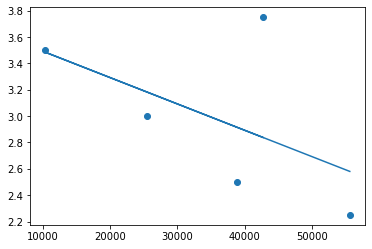

In [21]:
import matplotlib.pyplot as plt
from scipy import stats

y = [3.75, 3.5, 3, 2.5, 2.25] #EEI
x = [42728,10377,25451,38853.2,55616.6] #GDP per capita

slope, intercept, r, p, std_err = stats.linregress(x, y)

def myfunc(x):
    return slope * x + intercept

mymodel = list(map(myfunc, x))
fig = plt.figure()

plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show()
fig.savefig(r'C:\Users\gixi_\Downloads\Project2\linearregression_eei_gdp.jpg')

In [22]:
from scipy.stats import linregress

slope, intercept, r_value, p_value, std_err = linregress(x,y)
print(slope,intercept)

-1.99819132625366e-05 3.691477305556201


In [20]:
import numpy as np
y = [3.75, 3.5, 3, 2.5, 2.25] #EEI
x = [42728,10377,25451,38853.2,55616.6] #GDP per capita
correlation_matrix = np.corrcoef(x, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2

print(r_squared)

0.29394378134151955


In [ ]:
df.plot(kind='bar',x='name',y='age')